In [91]:
import pandas as pd

#Load file.
file_path = "/content/Student Test Performance.csv"
df = pd.read_csv(file_path)

#Display basic info.
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

(None,
   School DBN                     School Name School Level  \
 0     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
 1     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
 2     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
 3     01M140          P.S. 140 Nathan Straus          K-8   
 4     01M140          P.S. 140 Nathan Straus          K-8   
 
           Regents Exam  Year  Total Tested Mean Score Number Scoring Below 65  \
 0  Common Core Algebra  2017             4          s                       s   
 1   Living Environment  2015            16       77.9                       1   
 2   Living Environment  2016             9         74                       1   
 3  Common Core Algebra  2016             3          s                       s   
 4  Common Core Algebra  2017             2          s                       s   
 
   Percent Scoring Below 65 Number Scoring 65 or Above  \
 0                        s                          s   
 1       

In [92]:
import numpy as np

#Convert Mean Score to numeric, replacing non-numeric values with NaN.
df["Mean Score"] = pd.to_numeric(df["Mean Score"], errors='coerce')

#Drop rows with NaN values.
df_cleaned = df.dropna(subset=["Mean Score"])

#Display summary statistics to verify cleaning.
df_cleaned["Mean Score"].describe()

,Mean Score
count,137109.000000
mean,65.998967
std,11.288883
min,15.000000
25%,58.300000
50%,65.400000
75%,73.400000
max,98.700000


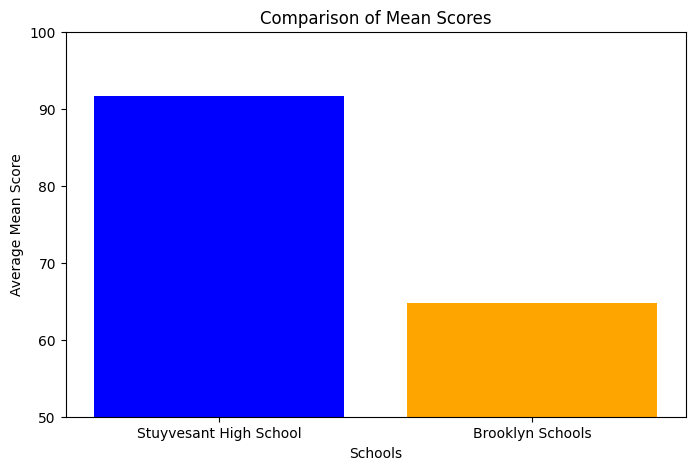

In [93]:
import matplotlib.pyplot as plt

#Selected school in Manhattan.
selected_school = "Stuyvesant High School"
manhattan_school = df_cleaned[df_cleaned["School Name"] == selected_school]

#Calculate Stuyvesant's mean score.
manhattan_mean_score = manhattan_school["Mean Score"].mean()

#Calculate mean scores for all schools in Brooklyn.
brooklyn_schools = df_cleaned[df_cleaned["School DBN"].str.contains(r"^\d{2}K", regex=True)]  #Regex to allow for any district number (first two digits) and the borough code K, for Brooklyn.
brooklyn_mean_score = brooklyn_schools["Mean Score"].mean()

#Plot comparison.
schools = ["Stuyvesant High School", "Brooklyn Schools"]
mean_scores = [manhattan_mean_score, brooklyn_mean_score]

plt.figure(figsize=(8, 5))
plt.bar(schools, mean_scores, color=["blue", "orange"])
plt.xlabel("Schools")
plt.ylabel("Average Mean Score")
plt.title("Comparison of Mean Scores")
plt.ylim(50, 100)
plt.show()

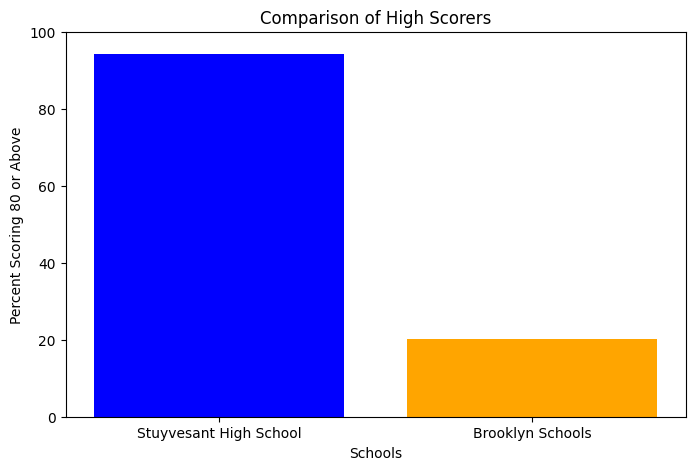

In [94]:
#Second comparison, using "Percent Scoring 80 or Above."

#Convert column to numeric.
df["Percent Scoring 80 or Above"] = pd.to_numeric(df["Percent Scoring 80 or Above"], errors='coerce')

#Drop rows with NaN values.
df_cleaned = df.dropna(subset=["Percent Scoring 80 or Above"])

#Select Stuyvesant High School again using previously set variable.
manhattan_school = df_cleaned[df_cleaned["School Name"] == selected_school]

#Calculate Stuyvesant's average percentage of students scoring 80 or above.
manhattan_high_score_pct = manhattan_school["Percent Scoring 80 or Above"].mean()

#Calculate the average percentage for Brooklyn schools.
brooklyn_schools = df_cleaned[df_cleaned["School DBN"].str.contains(r"^\d{2}K", regex=True)]  #Regex to allow for any district number (first two digits) and the borough code K, for Brooklyn.
brooklyn_high_score_pct = brooklyn_schools["Percent Scoring 80 or Above"].mean()

schools = ["Stuyvesant High School", "Brooklyn Schools"]
high_score_pct = [manhattan_high_score_pct, brooklyn_high_score_pct]

plt.figure(figsize=(8, 5))
plt.bar(schools, high_score_pct, color=["blue", "orange"])
plt.xlabel("Schools")
plt.ylabel("Percent Scoring 80 or Above")
plt.title("Comparison of High Scorers")
plt.ylim(0, 100)
plt.show()

In [95]:
#Conclusion: Stuyvesant High School shows a drastic difference from the entirety of Brooklyn schools in both mean testing scores and the percentage of students scoring 80% or higher.